In [8]:
%matplotlib inline
from fastai.vision import *
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Intial Pass
This notebook will be looking at an initial pass to the problem. This is a really basic model utilising transfer learning from the resnet34. This is a model trained on ImageNet with a high accuracy and so has a good intial setup to be able to detect shapes and items without any changes. On top of the resnet are put another few layers which can be tweaked. These layers are specific to the data and are used to classify the images into their respective asset class.

In [10]:
image_path = '/Users/henriwoodcock/Documents/Code/data_projects/automatic-asset-classification/data/final_dataset/final'

In [11]:
data = ImageDataBunch.from_folder(image_path, valid_pct = 0.2, size=224,ds_tfms=get_transforms(), 
                                  test = "test").normalize(imagenet_stats)

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
#fit on just end layers (other layers are froze)
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.855405,2.287496,0.709091,02:02
1,2.364770,1.244610,0.400000,01:55
2,1.776429,1.087535,0.318182,01:55
3,1.407994,0.989075,0.300000,01:54
4,1.150534,0.895786,0.281818,01:55
5,0.961681,0.815122,0.254545,01:55
6,0.814405,0.758273,0.254545,01:58
7,0.718241,0.745240,0.263636,02:13
8,0.633483,0.737815,0.236364,02:08
9,0.567571,0.721818,0.245455,02:12


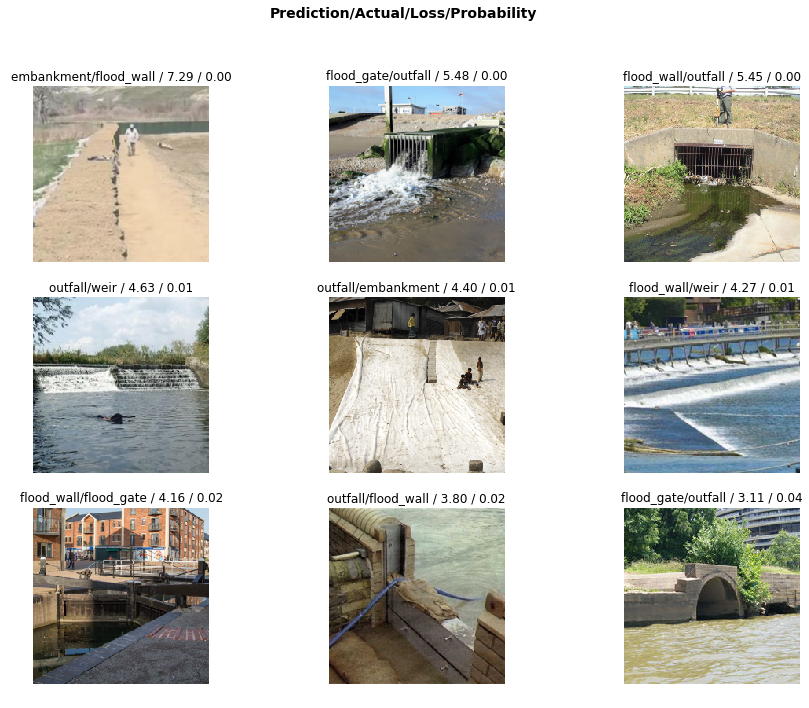

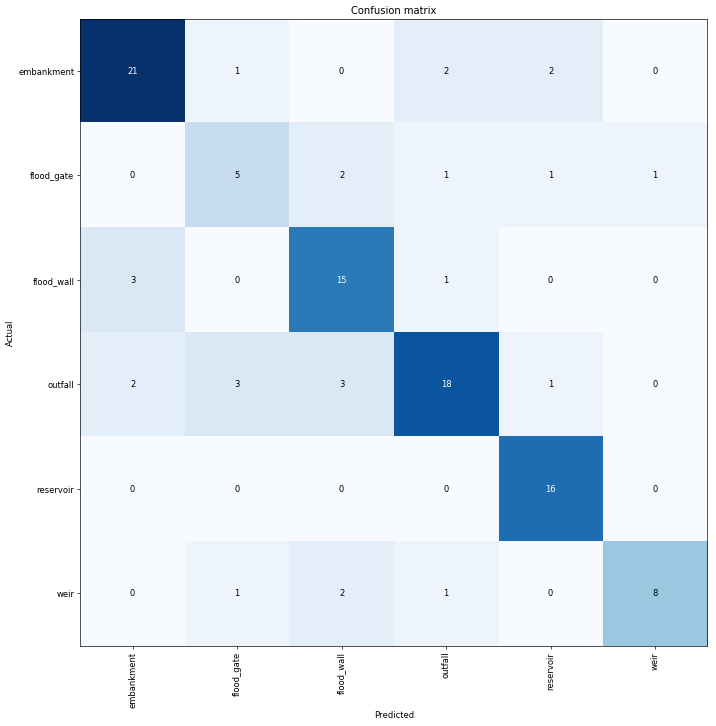

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
#len(data.valid_ds)==len(losses)==len(idxs)
#validation analysis
interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.10E-03


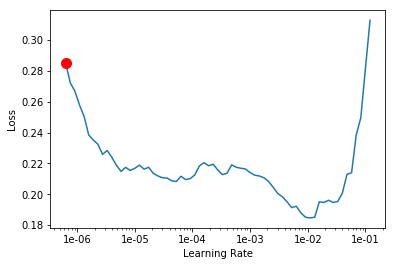

In [17]:
learn.recorder.plot(suggestion=True)

In [18]:
learn.fit_one_cycle(5, max_lr = slice(1e-06, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.216858,0.718310,0.245455,02:02
1,0.211097,0.731007,0.254545,01:53
2,0.220698,0.725028,0.263636,01:51
3,0.209996,0.724554,0.245455,01:55
4,0.193748,0.728875,0.254545,01:52


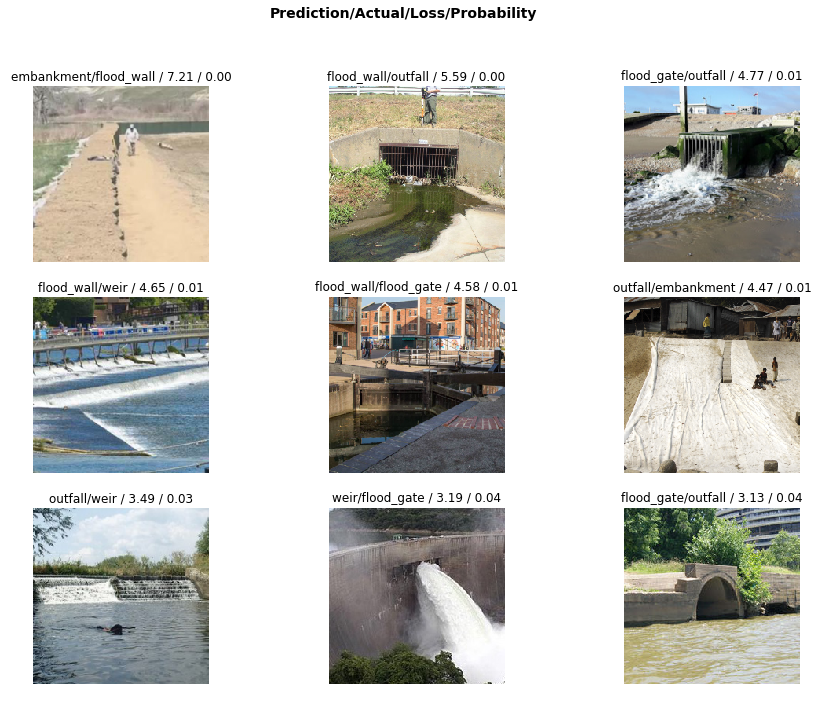

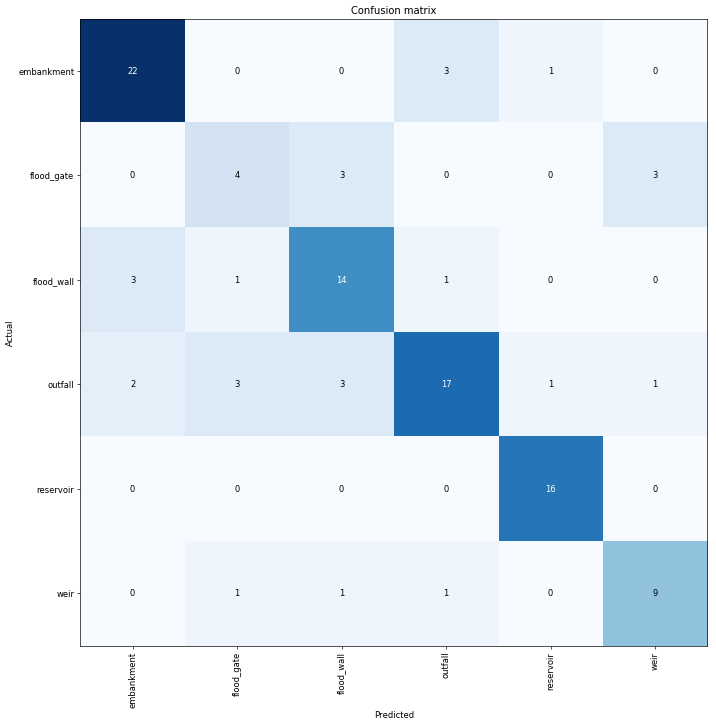

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
#len(data.valid_ds)==len(losses)==len(idxs)
#validation analysis
interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [20]:
data.classes

['embankment', 'flood_gate', 'flood_wall', 'outfall', 'reservoir', 'weir']